[-0.0, -9.121938503425073e-06, -5.287570357046057e-05, -8.61707953010731e-05, 2.445121863228628e-19, 0.0002509121935913198, 0.0005229521885378572, 0.0005150103906073287, -9.535095666901855e-19, -0.0008910059557813013, -0.0015913262183955366, -0.0013927985088289636, 2.0558373507976087e-18, 0.0020364009706419876, 0.003418492094263819, 0.002841110532331992, -3.4408662126465015e-18, -0.0038313410595579756, -0.006230658972425062, -0.005039546704029578, 4.969595020555271e-18, 0.006511027176017184, 0.010415788224940718, 0.008312148095767644, -6.488600954114304e-18, -0.010545144825832426, -0.016789340224580254, -0.013376577548256849, 7.845436978022183e-18, 0.01709678614722886, 0.02750004537340486, 0.022258536642414502, -8.903931386385518e-18, -0.0300532061285935, -0.05055398656601196, -0.04358956842269376, 9.557853959247204e-18, 0.07428725125738199, 0.15858931228916343, 0.22499010496729413, 0.24990117465341272, 0.22427915628675713, 0.15758705735941103, 0.07358228623284001, 9.43666269108077e-18

Text(0.5, 1.0, 'Hactual')

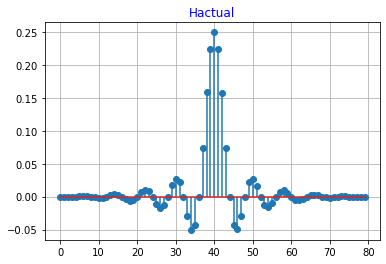

In [33]:
# experiment 4 - Design a low pass filter Type 1 fIR filter using Window design method for following specification
# wp = 0.2 Pi
# Ws = 0.3pi
# deltaP = deltaS = 0.01
import numpy as np
import matplotlib.pyplot as plt
import math

pi = np.pi

wp = 0.2*pi
Ws = 0.3*pi
deltaP = deltaS = 0.01
alphaS = 20*math.log(deltaS,10) #log(value,base)
alphaS = 40


# In hanning filter stop band attenuation is 44 and out attenuation is 40 so we will choose hannning filter
# equation of hanning filter is (1 - cos((2*pi*n)/(N-1)))/2
# and transition width is Ws - Wp = 8*pi/N 
# 0.3*pi - 0.2*pi = 8*pi/N then ==> N = 80
# now equation is  Hd[n] =  (1 - cos((2*pi*n)/(80-1))/2

Wn = []

for i in range(0,80):
    x =  (1 - np.cos((2*pi*i)/(79)))/2
    Wn.append(x)

# print(Wn)

# now HD for low pass filter
# hd[n]  = { sin(Wc*(n-Tow))/(pi*(n-tow))  n != tow
#                      Wc/pi               n  = tow      }


# Wc  = ( Wp + Ws )/2 = (0.2 + 0.3 )pi/2 ==> 0.25*pi
Hd = []
tow = 40
Wc =  0.25*pi
for n in range(0,80):
    if(n == tow):
        Hd.append(0.25)
    else:
        x = np.sin(Wc*(n-tow))/(pi*(n-tow))
        Hd.append(x)


# print(Hd)


Hactual = []

N = 80 

for i in range(0,N):
    x = Hd[i]*Wn[i]
    Hactual.append(x)


print(Hactual)
n = np.arange(0,80)
plt.stem(n,Hactual)
plt.grid()
plt.title('Hactual',color='b')



Text(0.5, 1.0, 'Hactual_fft')

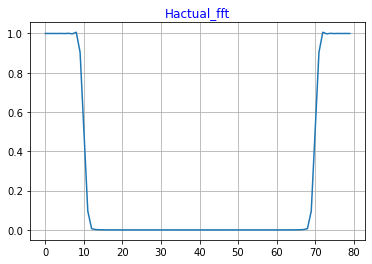

In [23]:
Hactual_fft = np.fft.fft(Hactual)
plt.plot(abs(Hactual_fft))
plt.grid()
plt.title('Hactual_fft',color='b')

In [43]:
max_for_deltaP = np.max(abs(Hactual_fft[0:10]))
max_for_deltaS = np.max(abs(Hactual_fft[10:20]))

actual_delta_p = max_for_deltaP - 1 
actual_delta_s = max_for_deltaS

print(actual_delta_p)
print(actual_delta_s)


0.005910284173742841
0.4999427598435654
